<center><h1>Time series - Laboratorio 2</h1></center>
<br>


In [1]:
# Packages
import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [3]:
# Plot settings
sns.set_context('notebook') 
sns.set_style('ticks')
red='#D62728'
blue='#1F77B4'
%matplotlib inline
plt.rcParams['figure.figsize'] = [12, 8]

## Data

Compañia Administradora del Mercado Mayorista Eléctrico.

In [5]:
#leemos data y parceamos por mes...

data = pd.read_csv('datasets/demanda.csv', index_col = 'TIPO', parse_dates = True, dayfirst = True)
data.head()


,Residencial,Comercial,Industrial/Comercial Grande,TOTAL
TIPO,,,,
2013-01-01,4538446.146,3319300.732,3276372.467,1.113412e+07
2013-02-01,3961686.119,2820263.212,3052210.676,9.834160e+06
2013-03-01,3612835.111,2861328.931,3281965.266,9.756129e+06
2013-04-01,3239380.702,2826797.310,3241156.151,9.307334e+06
2013-05-01,3919668.996,2948663.278,3364493.120,1.023283e+07


In [6]:
ts = data['TOTAL'] # Day indexed series
data.index = data.index.to_period(freq = 'M')
data.head()

,Residencial,Comercial,Industrial/Comercial Grande,TOTAL
TIPO,,,,
2013-01,4538446.146,3319300.732,3276372.467,1.113412e+07
2013-02,3961686.119,2820263.212,3052210.676,9.834160e+06
2013-03,3612835.111,2861328.931,3281965.266,9.756129e+06
2013-04,3239380.702,2826797.310,3241156.151,9.307334e+06
2013-05,3919668.996,2948663.278,3364493.120,1.023283e+07


In [7]:
data.describe().round(2)

,Residencial,Comercial,Industrial/Comercial Grande,TOTAL
count,79.00,79.00,79.00,79.00
mean,4551935.29,3113096.42,3187977.02,10853008.74
std,654164.93,206829.98,124659.74,816874.81
min,3239380.70,2809183.13,2897618.67,9307334.16
25%,3990580.45,2948084.14,3109179.19,10223259.40
50%,4470715.12,3070853.24,3199317.20,10706955.32
75%,5092450.46,3270751.91,3275571.56,11476364.98
max,6193110.21,3606989.07,3460879.97,12607552.72


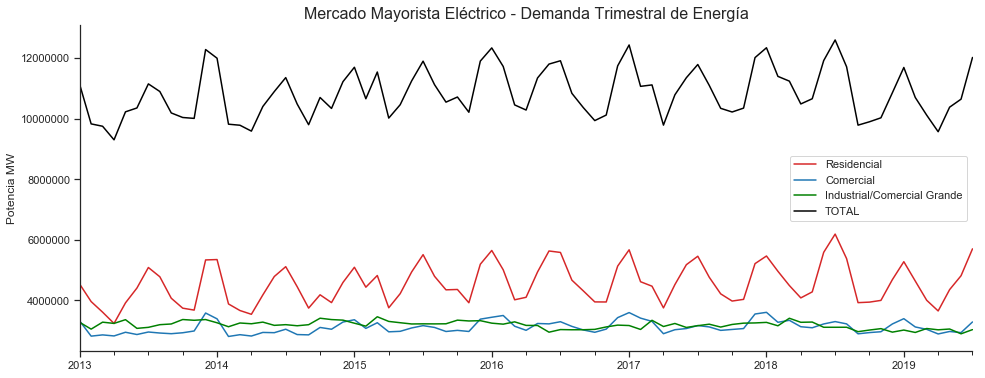

In [8]:
# analisis exploratorio

fig, ax = plt.subplots(figsize = (16, 6))
plt.ticklabel_format(style = 'plain')

data['Residencial'].plot(color = red, label = 'Residencial')
data['Comercial'].plot(color = blue, label = 'Comercial')
data['Industrial/Comercial Grande'].plot(color = 'green', label = 'Industrial/Comercial Grande')
data['TOTAL'].plot(color = 'black', label = 'TOTAL')

ax.set_title('Mercado Mayorista Eléctrico - Demanda Trimestral de Energía', fontsize = 16)
ax.set_xlabel('')
ax.set_ylabel('Potencia MW')
plt.legend(loc = 'best')

sns.despine()
plt.show()

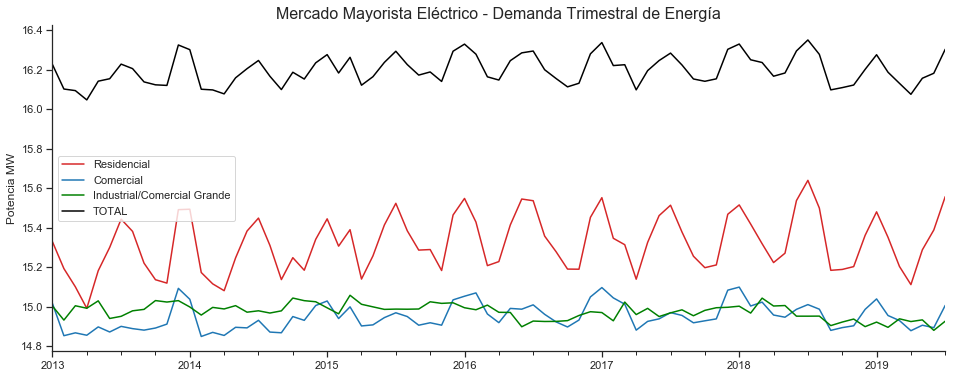

In [9]:
fig, ax = plt.subplots(figsize = (16, 6))

np.log(data['Residencial']).plot(color = red, label = 'Residencial')
np.log(data['Comercial']).plot(color = blue, label = 'Comercial')
np.log(data['Industrial/Comercial Grande']).plot(color = 'green', label = 'Industrial/Comercial Grande')
np.log(data['TOTAL']).plot(color = 'black', label = 'TOTAL')

ax.set_title('Mercado Mayorista Eléctrico - Demanda Trimestral de Energía', fontsize = 16)
ax.set_xlabel('')
ax.set_ylabel('Potencia MW')
plt.legend(loc = 'best')

sns.despine()
plt.show()

En escala de logaritmos devuelve lo mismo

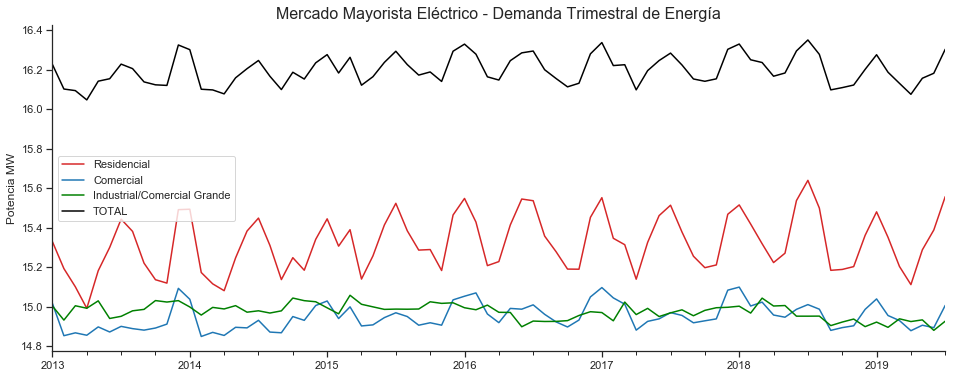

In [12]:
#ploteamos (log)series...

fig, ax = plt.subplots(figsize = (16, 6))

np.log(data['Residencial']).plot(color = red, label = 'Residencial')
np.log(data['Comercial']).plot(color = blue, label = 'Comercial')
np.log(data['Industrial/Comercial Grande']).plot(color = 'green', label = 'Industrial/Comercial Grande')
np.log(data['TOTAL']).plot(color = 'black', label = 'TOTAL')

ax.set_title('Mercado Mayorista Eléctrico - Demanda Trimestral de Energía', fontsize = 16)
ax.set_xlabel('')
ax.set_ylabel('Potencia MW')
plt.legend(loc = 'best')

sns.despine()
plt.show()


### Descomposición del total

In [13]:
ts.head()

TIPO
2013-01-01    1.113412e+07
2013-02-01    9.834160e+06
2013-03-01    9.756129e+06
2013-04-01    9.307334e+06
2013-05-01    1.023283e+07
Name: TOTAL, dtype: float64

In [12]:
decomposition = sm.tsa.x13_arima_analysis(ts, x12path = '.')
[attr for attr in dir(decomposition) if not attr.startswith('_')]


['irregular', 'observed', 'plot', 'results', 'seasadj', 'stdout', 'trend']

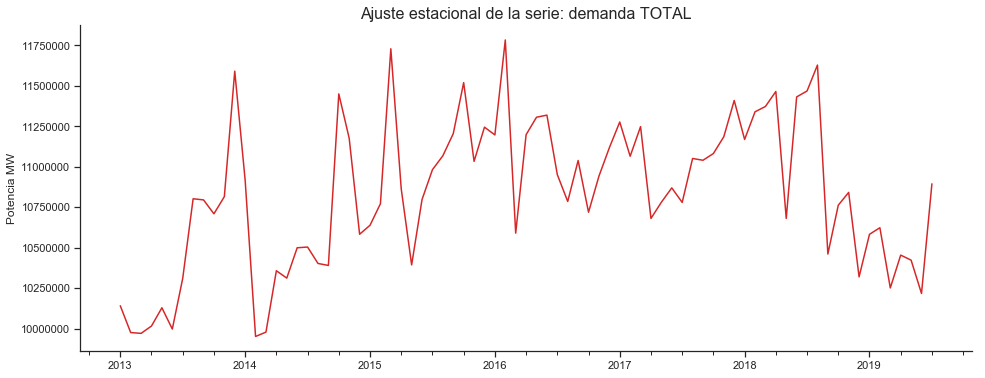

In [13]:
#ploteamos serie ajustada estacionalmente...
fig, ax = plt.subplots(figsize = (16, 6))
plt.ticklabel_format(style = 'plain')
decomposition.seasadj.plot(color = red)
ax.set_xlabel('')
ax.set_ylabel('Potencia MW')
ax.set_title('Ajuste estacional de la serie: demanda TOTAL', fontsize = 16)
#ax.set_xticks([], minor = True)
sns.despine()
plt.show()

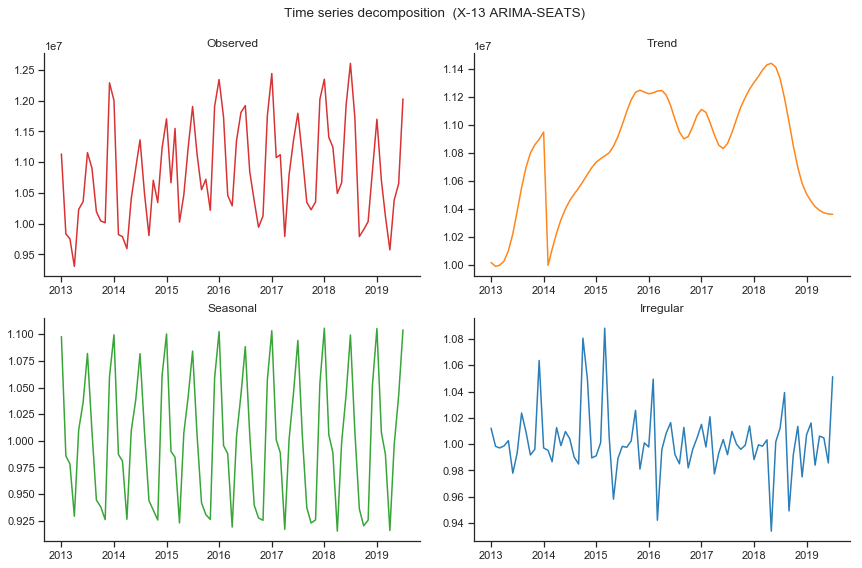

In [14]:
#descomponemos...
from plotting import plot_components_x13
plot_components_x13(decomposition)
plt.show()

In [15]:
z = decomposition.seasadj.copy()
z.index = ts.index.to_period(freq = 'M')

model_sm = sm.tsa.Holt(z).fit()
smoothed_sm = model_sm.fittedvalues
alpha_sm = model_sm.model.params['smoothing_level']
betha_sm = model_sm.model.params['smoothing_slope']
mse_sm = sm.tools.eval_measures.mse(ts,smoothed_sm)

print(' Smoothing parameter: alpha  {0:.3f}'.format(alpha_sm))
print(' Smoothing parameter: betha  {0:.3f}'.format(betha_sm))
print(' In-sample fit:')
print(' MSE               {0:.3f}'.format(mse_sm))
model_sm.summary()

 Smoothing parameter: alpha  0.384
 Smoothing parameter: betha  0.000
 In-sample fit:
 MSE               608698701812.201


Dep. Variable:,endog,No. Observations:,79
Model:,Holt,SSE,11011658546791.621
Optimized:,True,AIC,2035.182
Trend:,Additive,BIC,2044.659
Seasonal:,None,AICC,2036.348
Seasonal Periods:,None,Date:,"Sun, 15 Sep 2019"
Box-Cox:,False,Time:,22:02:54
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.3842037,alpha,True
smoothing_slope,0.000000,beta,True


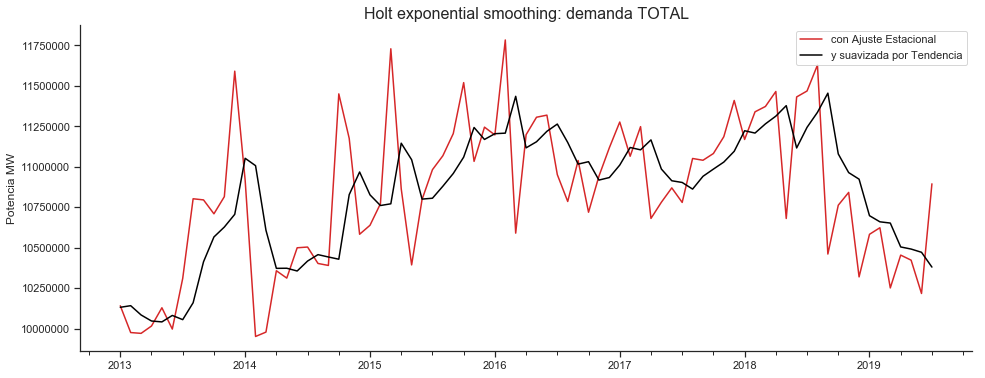

In [16]:
fig, ax = plt.subplots(figsize = (16, 6))
plt.ticklabel_format(style = 'plain')

ax.set_title('Holt exponential smoothing: demanda TOTAL', fontsize = 16)

z.plot(color = '#D62728', label = 'con Ajuste Estacional')
smoothed_sm.plot(color = 'black', label = 'y suavizada por Tendencia')

plt.legend(loc = 'best')
ax.set_xlabel('')
ax.set_ylabel('Potencia MW')

sns.despine()
plt.show()


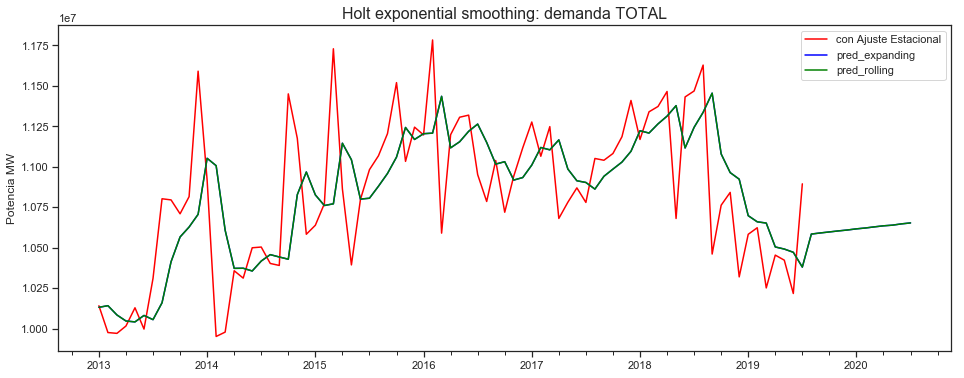

In [17]:
h = 12
w = h * 12
Z = z

model = sm.tsa.Holt
pred_index = Z.index[-1] + np.array(range(1, h + 1))
pred_rolling = pd.Series(0, index = pred_index)
pred_expanding = pd.Series(0, index = pred_index)
orig_fit = None

for i in range(0, h):
    current = pd.concat([Z, pred_expanding.head(i)])
    expanding = model(current).fit()
    if i == 0:
        orig_fit = expanding.fittedvalues
        
    rolling = model(current.tail(w)).fit()
    pred_expanding.update(expanding.forecast(1))
    pred_rolling.update(rolling.forecast(1))
    
ax = Z[-w:].plot(color = 'red', figsize = (16, 6), label = 'con Ajuste Estacional')
ax.set_title('Holt exponential smoothing: demanda TOTAL', fontsize = 16)
ax.set_xlabel('')
ax.set_ylabel('Potencia MW')

pd.concat([orig_fit[-w:], pred_expanding]).plot(ax = ax, color = 'blue', label = 'pred_expanding')
pd.concat([orig_fit[-w:], pred_rolling]).plot(ax = ax, color = 'green', label = 'pred_rolling')

plt.legend(loc = 'best')
plt.show()


## Diagnóstico.

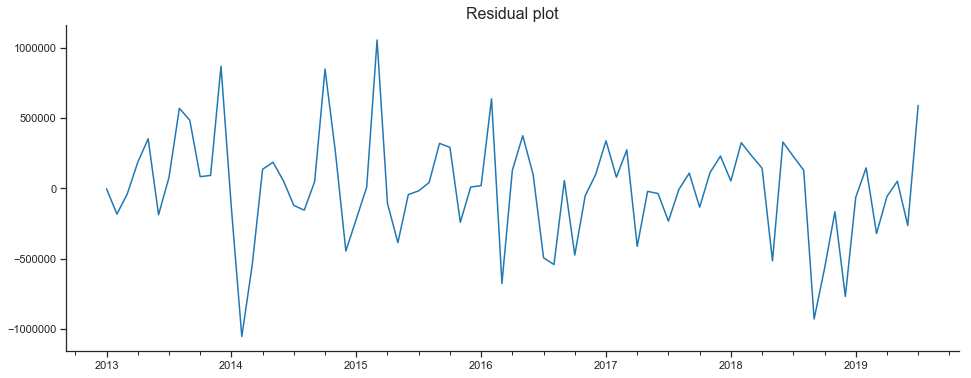

In [23]:
resid = (data['TOTAL'] - mhw_sm.fittedvalues)
fig, ax = plt.subplots(figsize = (16, 6))
resid.plot(color = blue)
ax.set_xlabel('')
ax.set_title('Residual plot', fontsize = 16)
sns.despine()
plt.show()


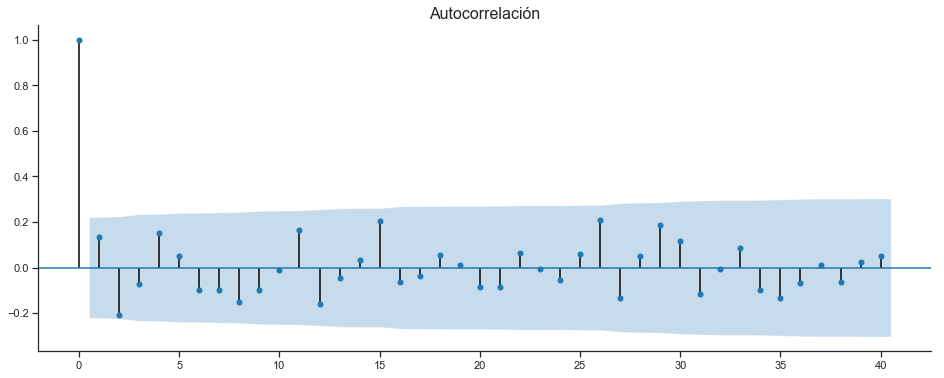

In [24]:
fig, ax = plt.subplots(figsize = (16, 6))
sm.graphics.tsa.plot_acf(resid, lags = 40, ax = ax)
ax.set_title('Autocorrelación', fontsize = 16)
sns.despine()
plt.show()

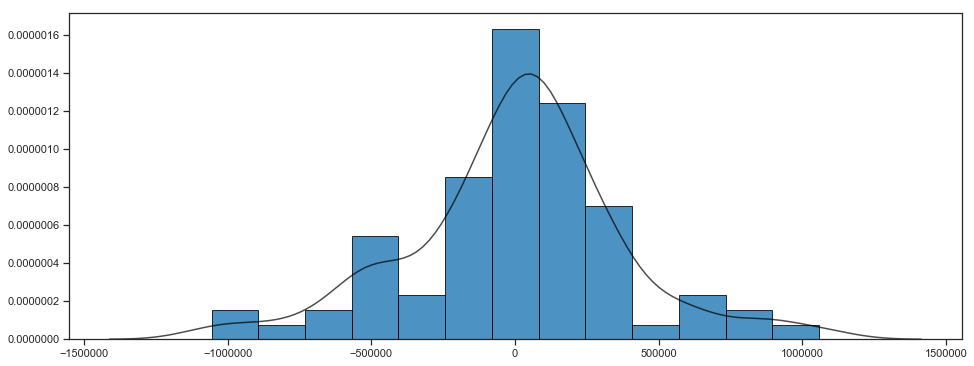

In [26]:
from plotting import histogram
fig, ax = plt.subplots(figsize = (16, 6))
sns.distplot(resid, ax = ax, hist_kws = {'alpha': 0.8, 'edgecolor':'black', 'color': blue},  
                 kde_kws = {'color': 'black', 'alpha': 0.7})
plt.show()

## Validación.

In [27]:
start_val = data['TOTAL'].index[-round(len(data['TOTAL']) / 12 * .2) * 12]
start_val


Period('2018-08', 'M')

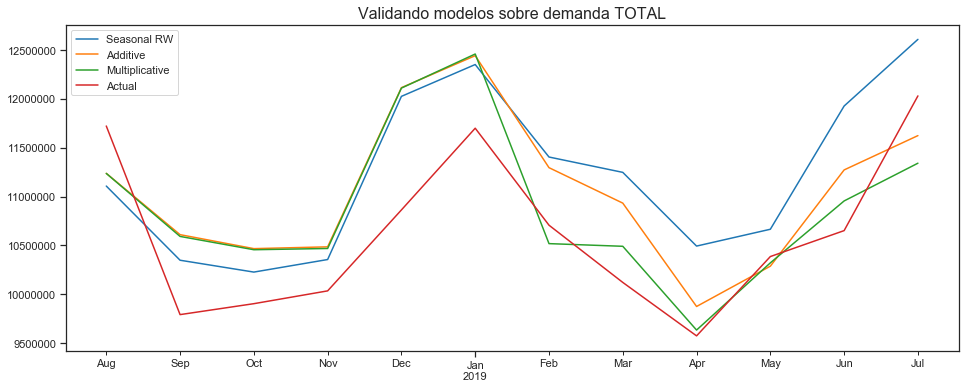

In [28]:
#comparamos métodos...

validation = data['TOTAL'][start_val:].index
start = data['TOTAL'].index.get_loc(start_val) 

pred1 = [] # seasonal random walk
pred2 = [] # additive holt winters
pred3 = [] # multiplicative holt winters
actual= []

for i in range(start, len(data['TOTAL'])):
    
    actual.append(data['TOTAL'].iloc[i])
    
    pred1.append(data['TOTAL'].iloc[i-12])
    
    model = sm.tsa.ExponentialSmoothing(data['TOTAL'].iloc[:i], trend = 'add', damped = False, seasonal = 'add', seasonal_periods = 12).fit()
    pred2.append(model.forecast(1)[0])
    
    model = sm.tsa.ExponentialSmoothing(data['TOTAL'].iloc[:i], trend = 'add', damped = False, seasonal = 'mul', seasonal_periods = 12).fit()
    pred3.append(model.forecast(1)[0])
    

columns = ['Seasonal RW', 'Additive', 'Multiplicative', 'Actual']
results = np.vstack([pred1, pred2, pred3, actual]).T
results = pd.DataFrame(results, columns = columns, index = validation)

fig, ax = plt.subplots(figsize = (16, 6))
plt.ticklabel_format(style = 'plain')

results.plot(ax = ax)
ax.set_title('Validando modelos sobre demanda TOTAL', fontsize = 16)
ax.set_xlabel('')

plt.show()


In [29]:
from scipy import stats

table = pd.DataFrame(0.0, index = results.columns[:-1], columns = ['RMSE', 'SE'])
for i in range(len(results.columns)-1):
    table.iloc[i, 0] = sm.tools.eval_measures.rmse(results.iloc[:, i], results.iloc[:, -1])
    table.iloc[i, 1] = (results.iloc[:, i] - results.iloc[:, -1]).sem()
table


,RMSE,SE
Seasonal RW,779964.34,148054.67
Additive,657764.44,150172.34
Multiplicative,594545.13,161499.99
